In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
raw_data = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')
raw_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
raw_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [12]:
raw_data = raw_data.dropna(axis=0)

In [17]:
data_req = raw_data[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', "SALES", 'MSRP']]

In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(data_req)

In [33]:
scaled

array([[ 3.10448270e-01,  7.99888613e-01, -1.48615652e+00,
         3.03513655e-01, -1.41133464e-01],
       [-1.44081635e+00, -5.84415234e-01,  1.65722489e+00,
        -1.16521367e+00, -1.41133464e-01],
       [-1.33780078e+00,  7.99888613e-01,  6.09431090e-01,
         8.52377968e-01,  2.84056664e+00],
       [-4.10660691e-01,  7.99888613e-01, -1.48615652e+00,
         2.91271633e-01,  2.84056664e+00],
       [-1.02875409e+00,  7.99888613e-01, -7.00311164e-01,
        -6.01262937e-01,  2.84056664e+00],
       [-5.13676257e-01,  6.15314767e-01, -9.62259615e-01,
        -3.80894847e-01,  4.35161514e-01],
       [ 1.34060393e+00,  7.99888613e-01, -7.00311164e-01,
         1.15434007e+00,  4.35161514e-01],
       [-8.22722955e-01, -1.66361751e+00,  3.47482639e-01,
        -1.23594406e+00,  4.35161514e-01],
       [ 1.23758836e+00,  7.99888613e-01, -1.22420807e+00,
         3.39859604e+00,  2.31438427e+00],
       [ 1.54663506e+00,  7.99888613e-01, -9.62259615e-01,
         3.69598491e+00

<AxesSubplot:>

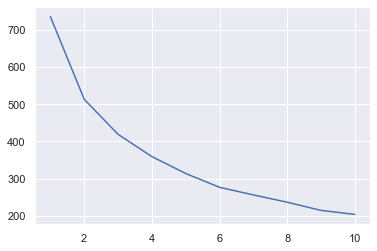

In [25]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(scaled)
    wcss.append(clustering.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)

In [38]:
k = 5
kmean = KMeans(4).fit(scaled)
labels = kmean.labels_

Text(0, 0.5, 'ORDERLINENUMBER')

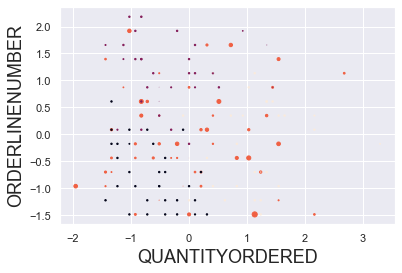

In [39]:
area = np.pi * ( scaled[:, 1]) ** 2
plt.scatter(scaled[:, 0], scaled[:, 2], s= area, c= labels.astype(float), alpha=1.0)
plt.xlabel('QUANTITYORDERED', fontsize=18)
plt.ylabel('ORDERLINENUMBER', fontsize=18)

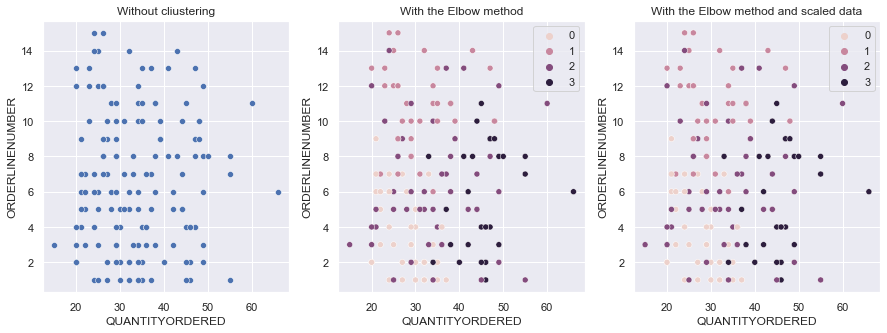

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=data_req, x='QUANTITYORDERED', y='ORDERLINENUMBER').set_title('Without cliustering')
sns.scatterplot(ax=axes[1], data=data_req, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=kmean.labels_).set_title('With the Elbow method')
sns.scatterplot(ax=axes[2], data=data_req, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=kmean.labels_).set_title('With the Elbow method and scaled data');